# **Ejemplo PCA**



In [59]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns  

import warnings  
warnings.simplefilter(action="ignore", category=FutureWarning)

%matplotlib inline
sns.set()
from subprocess import check_output

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/mn-ariel/course-machile-learning/main/datasets/credit_data.csv')

In [62]:
print(df.shape)
print(df.columns)
print(df.isnull().sum())
print(df.nunique())

(1000, 11)
Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64
Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64


In [63]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [64]:
df.rename(columns=lambda x:x.replace('Unnamed: 0','id'), inplace = True )

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [66]:
df['Checking account'].fillna('no-info', inplace = True)
df['Saving accounts'].fillna('no-info', inplace = True)

In [67]:
df.head()

,id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,no-info,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,no-info,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


# **EDA:Exploratory Data Analysis(Data Visualization**

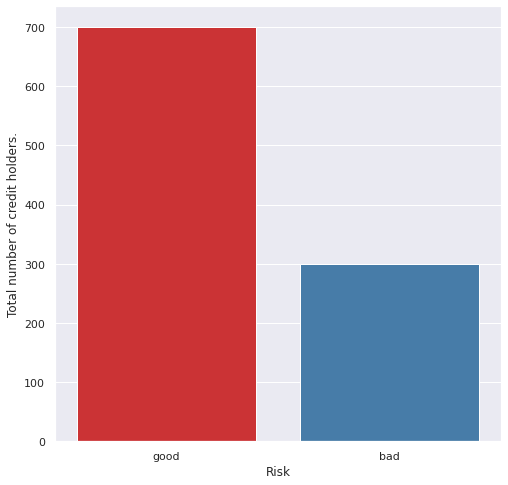

In [10]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.countplot(x="Risk", data=df, palette="Set1")
plt.ylabel('Total number of credit holders.')
plt.show()

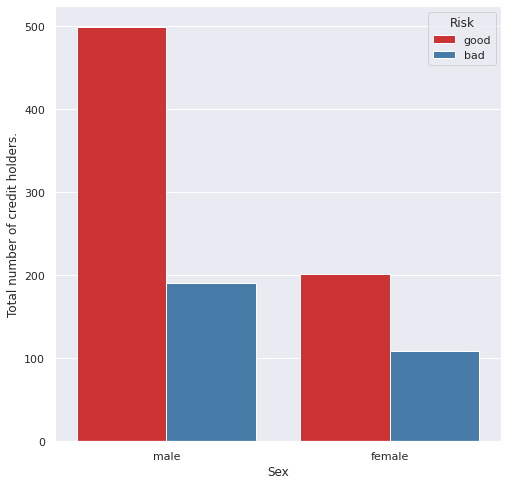

In [11]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.countplot('Sex',hue='Risk', data=df, palette="Set1")
plt.ylabel('Total number of credit holders.')
plt.show()

In [69]:
gender_df = df.groupby(['Sex','Risk'])['Purpose'].value_counts()
gender_df

Sex     Risk  Purpose            
female  bad   car                     40
              furniture/equipment     28
              radio/TV                19
              education                9
              business                 7
              domestic appliances      2
              repairs                  2
              vacation/others          2
        good  radio/TV                66
              car                     54
              furniture/equipment     46
              education               15
              business                12
              domestic appliances      4
              repairs                  3
              vacation/others          1
male    bad   car                     66
              radio/TV                43
              furniture/equipment     30
              business                27
              education               14
              repairs                  6
              vacation/others          3
              domestic 

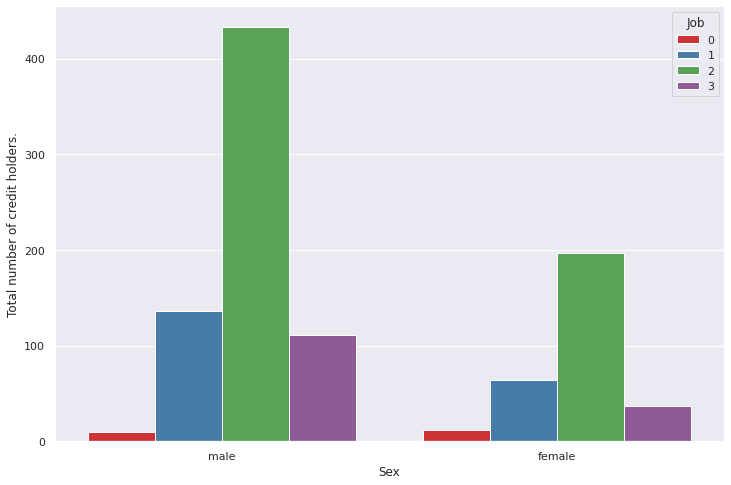

In [70]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot('Sex', hue='Job', data=df, palette="Set1")
plt.ylabel('Total number of credit holders.')
plt.show()

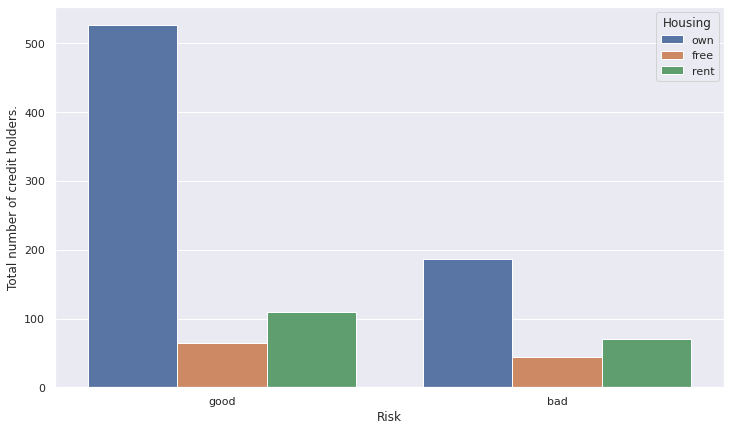

In [71]:
plt.figure(figsize=(12,7))
ax = sns.countplot('Risk',hue='Housing', data = df)
plt.ylabel('Total number of credit holders.')
plt.show()

In [72]:
gender_df = df.groupby(['Purpose','Risk'])['Sex'].value_counts()
gender_df

Purpose              Risk  Sex   
business             bad   male       27
                           female      7
                     good  male       51
                           female     12
car                  bad   male       66
                           female     40
                     good  male      177
                           female     54
domestic appliances  bad   female      2
                           male        2
                     good  female      4
                           male        4
education            bad   male       14
                           female      9
                     good  male       21
                           female     15
furniture/equipment  bad   male       30
                           female     28
                     good  male       77
                           female     46
radio/TV             bad   male       43
                           female     19
                     good  male      152
                       

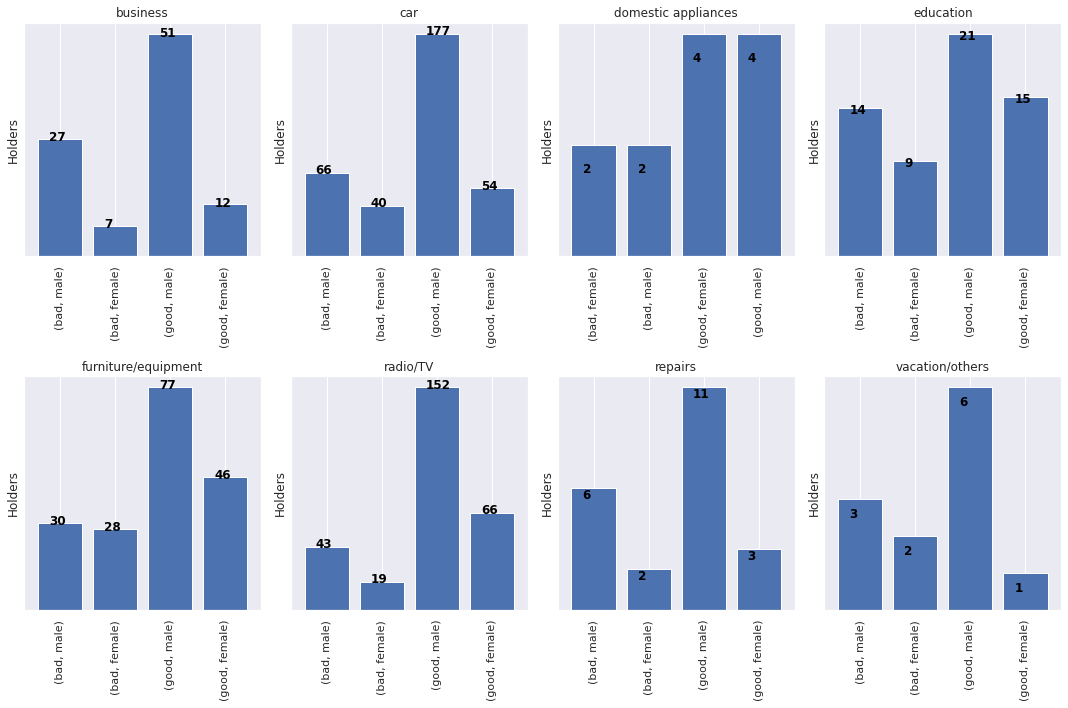

In [73]:
purpose_group = gender_df.groupby('Purpose')
fig = plt.figure()
count =  1

for gender, group in purpose_group:
    ax = fig.add_subplot(2,4,count)
    ax.set_title(gender)
    ax = group[gender].plot.bar(figsize = (15,10), width = 0.8)
    
    count+=1
    
    plt.xlabel('')
    plt.yticks([])
    plt.ylabel('Holders')
    
    total_of_holders = []
    for i in ax.patches:
        total_of_holders.append(i.get_height())
        total = sum(total_of_holders)
    for i in ax.patches:
         ax.text(i.get_x()+0.2, i.get_height()-0.5,s= i.get_height(),color="black",fontweight='bold')
plt.tight_layout()
plt.show()

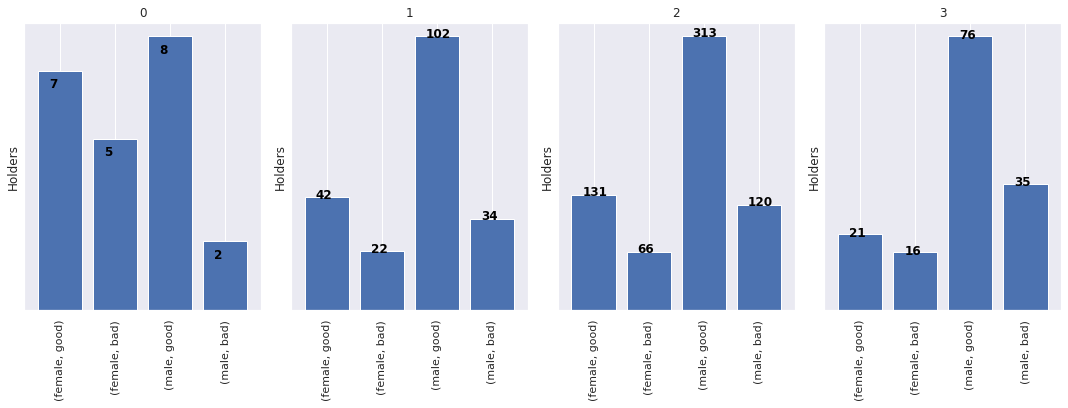

In [74]:
job_df = df.groupby(['Job','Sex'])['Risk'].value_counts()
job_group = job_df.groupby('Job')

fig = plt.figure()
count =  1

for gender, group in job_group:
    ax = fig.add_subplot(2,4,count)
    ax.set_title(gender)
    ax = group[gender].plot.bar(figsize = (15,10), width = 0.8)
    
    count+=1
    
    plt.xlabel('')
    plt.yticks([])
    plt.ylabel('Holders')
    
    total_of_holders = []
    for i in ax.patches:
        total_of_holders.append(i.get_height())
        total = sum(total_of_holders)
    for i in ax.patches:
         ax.text(i.get_x()+0.2, i.get_height()-0.5,s= i.get_height(),color="black",fontweight='bold')
plt.tight_layout()
plt.show()

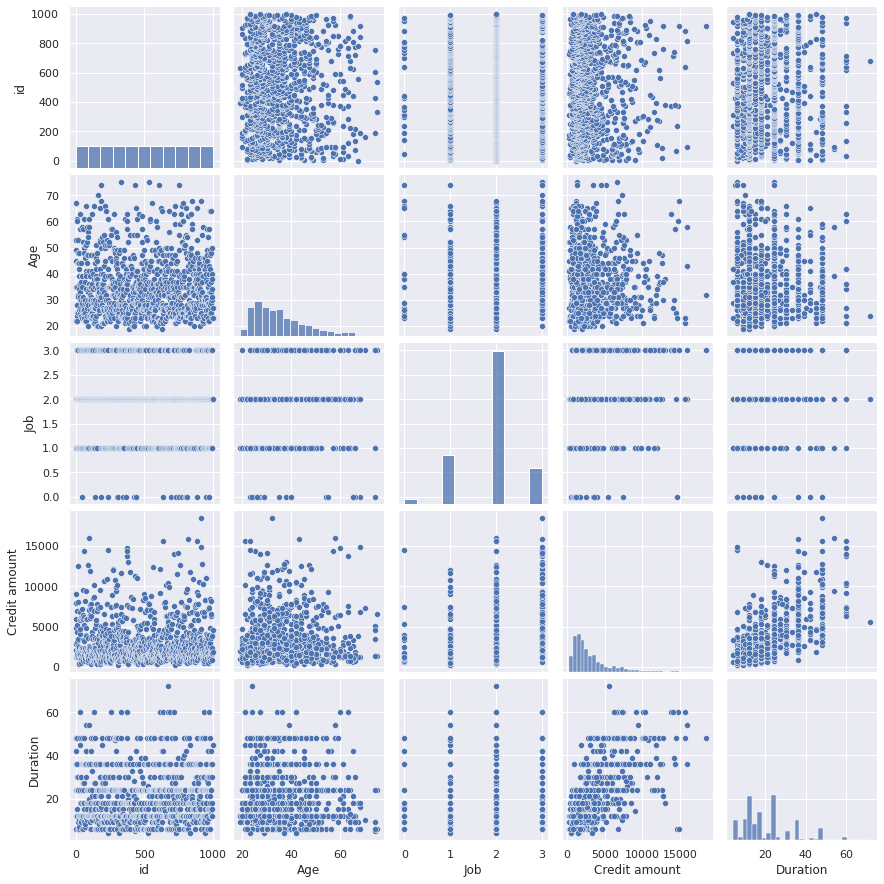

In [75]:
sns.pairplot(data = df)
plt.show()

# **Preprocesamiento del conjunto de datos:**
## Tenemos que convertir todos los valores categóricos en valores numéricos.

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Housing'] = le.fit_transform(df['Housing'])
df['Purpose'] = le.fit_transform(df['Purpose'])
df['Risk'] = le.fit_transform(df['Risk'])
df['Saving accounts'] = le.fit_transform(df['Saving accounts'])
df['Checking account'] = le.fit_transform(df['Checking account'])

In [78]:
df.head(10)

,id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,1,2,1,2,0,1169,6,5,1
1,1,22,0,2,1,0,1,5951,48,5,0
2,2,49,1,1,1,0,2,2096,12,3,1
3,3,45,1,2,0,0,0,7882,42,4,1
4,4,53,1,2,0,0,0,4870,24,1,0
5,5,35,1,1,0,2,2,9055,36,3,1
6,6,53,1,2,1,3,2,2835,24,4,1
7,7,35,1,3,2,0,1,6948,36,1,1
8,8,61,1,1,1,4,2,3059,12,5,1
9,9,28,1,3,1,0,1,5234,30,1,0


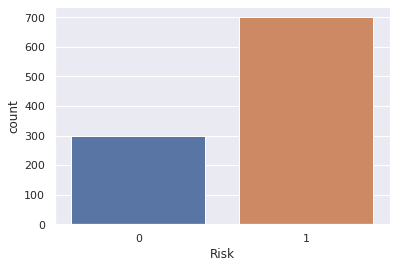

In [20]:
sns.countplot('Risk', data = df)
plt.show()

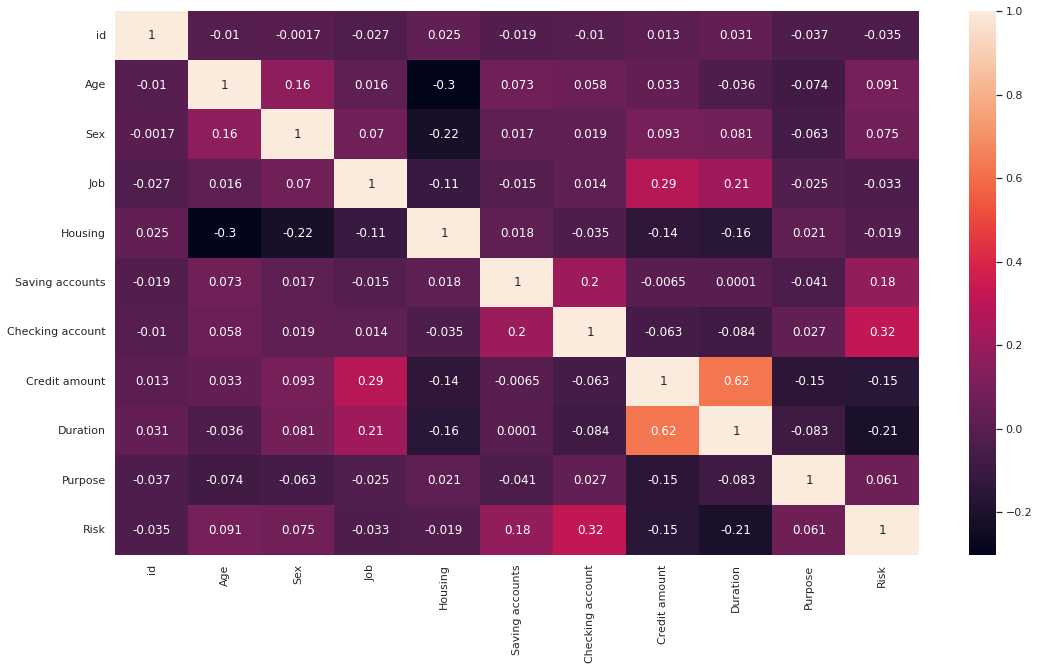

In [79]:
corr = df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot = True)
plt.show()

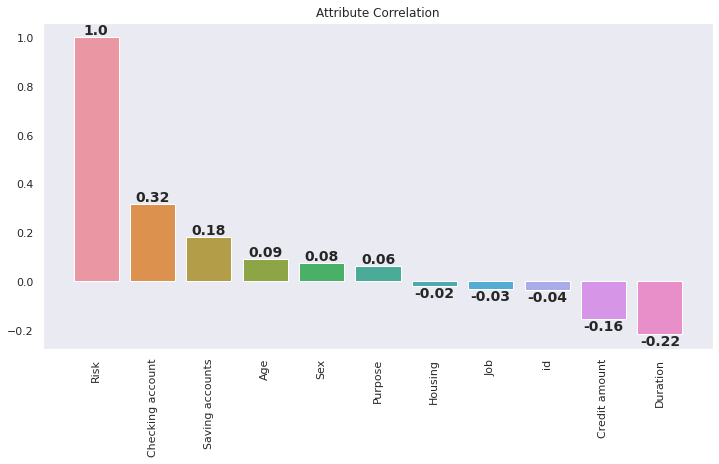

In [80]:
corr_matrix = df.corr().round(3)
corr_target = corr_matrix['Risk'].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(x=corr_target.index, y=corr_target.values, ax=ax)

ax.grid(False)
ax.set_title('Attribute Correlation')

plt.setp(ax.get_xticklabels(), rotation=90)

for n, x in enumerate(corr_target.index):
  if corr_target[n] >= 0:
    ax.text(x=n, y=corr_target[n], s=corr_target[n].round(2),
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=14, fontweight='bold')
  else:
    ax.text(x=n, y=corr_target[n], s=corr_target[n].round(2),
            horizontalalignment='center', verticalalignment='top',
            fontsize=14, fontweight='semibold')

ax.axis('tight')    

plt.show()

# **PCA para Visualización de Datos**

# **Pasos:**

1. **Estandarice los datos**: dado que PCA produce un subespacio de características que maximiza la variación a lo largo de los ejes, tiene sentido estandarizar los datos, especialmente si se midieron en diferentes escalas. Aunque todas las características del conjunto de datos de Iris se midieron en centímetros, continuemos con la transformación de los datos a escala unitaria (media = 0 y varianza = 1), que es un requisito para el rendimiento óptimo de muchos algoritmos de aprendizaje automático.
2. Proyección PCA a 2D
3. Visualizar proyección 2D

In [81]:
df.columns

Index(['id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [83]:
features = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose']
x = df.loc[:,features].values
y = df.loc[:,['Risk']].values

In [84]:
#Paso 1: Estandarizar los datos
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(x) 

In [85]:
pd.DataFrame(data = X, columns = features).head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,2.766456,0.670280,0.146949,-0.133710,0.955847,-1.344000,-0.745131,-1.236478,1.073263
1,-1.191404,-1.491914,0.146949,-0.133710,-0.706496,-0.265348,0.949817,2.248194,1.073263
2,1.183312,0.670280,-1.383771,-0.133710,-0.706496,0.813303,-0.416562,-0.738668,0.061705
3,0.831502,0.670280,0.146949,-2.016956,-0.706496,-1.344000,1.634247,1.750384,0.567484
4,1.535122,0.670280,0.146949,-2.016956,-0.706496,-1.344000,0.566664,0.256953,-0.949853


In [86]:
# Paso 2 : PCA Proyección a 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform (x)
principalDf = pd.DataFrame(data = principalComponents, columns=['PC1','PC2','PC3']) #PC = Principal component 
principalDf.head()

,PC1,PC2,PC3
0,-2102.286304,32.863267,3.381689
1,2679.802744,-17.319442,-17.091345
2,-1175.275867,14.425822,3.212516
3,4610.783009,7.087788,-10.252799
4,1598.747111,17.189644,-1.981971


In [87]:
finalDf = pd.concat([principalDf,df[['Risk']]], axis = 1)
finalDf.head()

,PC1,PC2,PC3,Risk
0,-2102.286304,32.863267,3.381689,1
1,2679.802744,-17.319442,-17.091345,0
2,-1175.275867,14.425822,3.212516,1
3,4610.783009,7.087788,-10.252799,1
4,1598.747111,17.189644,-1.981971,0


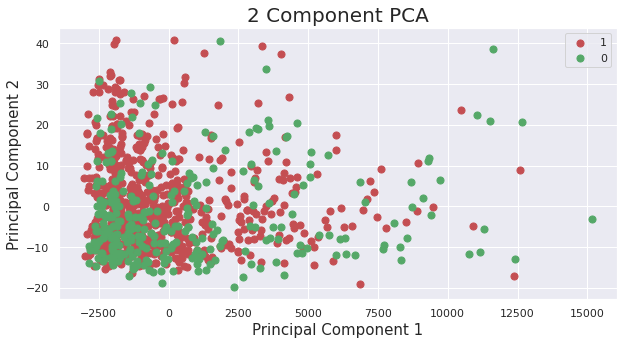

In [88]:
# Step 3 - Visualizar los datos en 2D.
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [1,0]

colors = ['r','g']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Risk'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
plt.show()

# **Varianza explicada**

La varianza explicada nos dice cuánta información (varianza) se puede atribuir a cada uno de los componentes principales.

In [89]:
pca.explained_variance_ratio_

array([9.99971777e-01, 1.64093652e-05, 1.09428231e-05])

In [91]:
y = df['Risk']
X = df.drop(['Risk','id'], axis = 1)

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [94]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [95]:
y_test.value_counts()

1    141
0     59
Name: Risk, dtype: int64

# **Models**

# **Random Forest Classifier**

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

rfc_clf = RandomForestClassifier()
params = {'n_estimators':[25,50,100,150,200,500],'max_depth':[0.5,1,5,10],'random_state':[1,10,20,42],
          'n_jobs':[1,2]}
grid_search_cv = GridSearchCV(rfc_clf, params, scoring='precision')
grid_search_cv.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [0.5, 1, 5, 10],
                         'n_estimators': [25, 50, 100, 150, 200, 500],
                         'n_jobs': [1, 2], 'random_state': [1, 10, 20, 42]},
             scoring='precision')

In [38]:
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_params_)

RandomForestClassifier(max_depth=10, n_estimators=25, n_jobs=1, random_state=1)
{'max_depth': 10, 'n_estimators': 25, 'n_jobs': 1, 'random_state': 1}


In [39]:
rfc_clf = grid_search_cv.best_estimator_
rfc_clf.fit(X_train,y_train)
rfc_clf_pred = rfc_clf.predict(X_test)
print('Accuracy:',accuracy_score(rfc_clf_pred,y_test) )
print('Matris de Confusion:', confusion_matrix(rfc_clf_pred,y_test).ravel()) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(rfc_clf_pred,y_test))

score_rfc = cross_val_score(rfc_clf,X_train,y_train,cv = 10).mean()
print('cross val score:', score_rfc)

Accuracy: 0.775
Confusion Matrix: [ 26  12  33 129]
Classification report:
              precision    recall  f1-score   support

           0       0.44      0.68      0.54        38
           1       0.91      0.80      0.85       162

    accuracy                           0.78       200
   macro avg       0.68      0.74      0.69       200
weighted avg       0.82      0.78      0.79       200

cross val score: 0.7325


# **SupportVectorClassifier:**

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

params = {'C': [0.75, 0.85, 0.95, 1], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
          'degree': [3, 4, 5]}

svc_clf = SVC(random_state=42)
grid_search_cv = GridSearchCV(svc_clf, params)
grid_search_cv.fit(X_train, y_train)

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [0.75, 0.85, 0.95, 1], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [41]:
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_params_)

SVC(C=0.85, random_state=42)
{'C': 0.85, 'degree': 3, 'kernel': 'rbf'}


In [42]:
svc_clf = grid_search_cv.best_estimator_
svc_clf.fit(X_train,y_train)
svc_pred = svc_clf.predict(X_test)

print('Accuracy:',accuracy_score(svc_pred,y_test) )
print('Confusion Matrix:', confusion_matrix(svc_pred,y_test,labels=[0,1])) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(svc_pred,y_test))

score_svc = cross_val_score(svc_clf,X_train,y_train, cv = 10).mean()
print('cross val score:', score_svc)

Accuracy: 0.755
Confusion Matrix: [[ 16   6]
 [ 43 135]]
Classification report:
              precision    recall  f1-score   support

           0       0.27      0.73      0.40        22
           1       0.96      0.76      0.85       178

    accuracy                           0.76       200
   macro avg       0.61      0.74      0.62       200
weighted avg       0.88      0.76      0.80       200

cross val score: 0.7375


# **Logistic Regression**

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

print('Accuracy:',accuracy_score(lr_pred,y_test) )
print('Confusion Matrix:', confusion_matrix(lr_pred,y_test,labels=[0,1])) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(lr_pred,y_test))

score_lr = cross_val_score(lr,X_train,y_train,cv=10).mean()
print('cross val score:', score_lr)

Accuracy: 0.76
Confusion Matrix: [[ 20   9]
 [ 39 132]]
Classification report:
              precision    recall  f1-score   support

           0       0.34      0.69      0.45        29
           1       0.94      0.77      0.85       171

    accuracy                           0.76       200
   macro avg       0.64      0.73      0.65       200
weighted avg       0.85      0.76      0.79       200

cross val score: 0.72


# **Gradient Boosting: Classifier**

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_pred = gbc.predict(X_test)

print('Accuracy:',accuracy_score(gbc_pred,y_test) )
print('Confusion Matrix:', confusion_matrix(gbc_pred,y_test,labels=[0,1])) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(gbc_pred,y_test))

score_gbc = cross_val_score(gbc,X_train,y_train, scoring='accuracy', cv = 10).mean()
print('cross val score:', score_gbc)

Accuracy: 0.75
Confusion Matrix: [[ 23  14]
 [ 36 127]]
Classification report:
              precision    recall  f1-score   support

           0       0.39      0.62      0.48        37
           1       0.90      0.78      0.84       163

    accuracy                           0.75       200
   macro avg       0.65      0.70      0.66       200
weighted avg       0.81      0.75      0.77       200

cross val score: 0.72375


In [45]:
models = pd.DataFrame({'Models':['Random Forest Classifier','Logistic Regression', 
                                 'Gradient Boost Classifier', 'Support Vector Classifier'],
                      'Score':[score_rfc,score_lr,score_gbc,score_svc]})
models.sort_values(by='Score', ascending = False)

,Models,Score
3,Support Vector Classifier,0.73750
0,Random Forest Classifier,0.73250
2,Gradient Boost Classifier,0.72375
1,Logistic Regression,0.72000


### **La precisión se mide por el área bajo la curva ROC. Un área de 1 representa una prueba perfecta; un área de .5 representa una prueba sin valor.**

Una guía aproximada para clasificar la precisión de una prueba de diagnóstico es el sistema académico tradicional de puntos:**

* .90-1 = excelente (A)

* .80-.90 = bueno (B)

* .70-.80 = justo (C)

* .60-.70 = pobre (D)

* .50-.60 = reprobado (F)

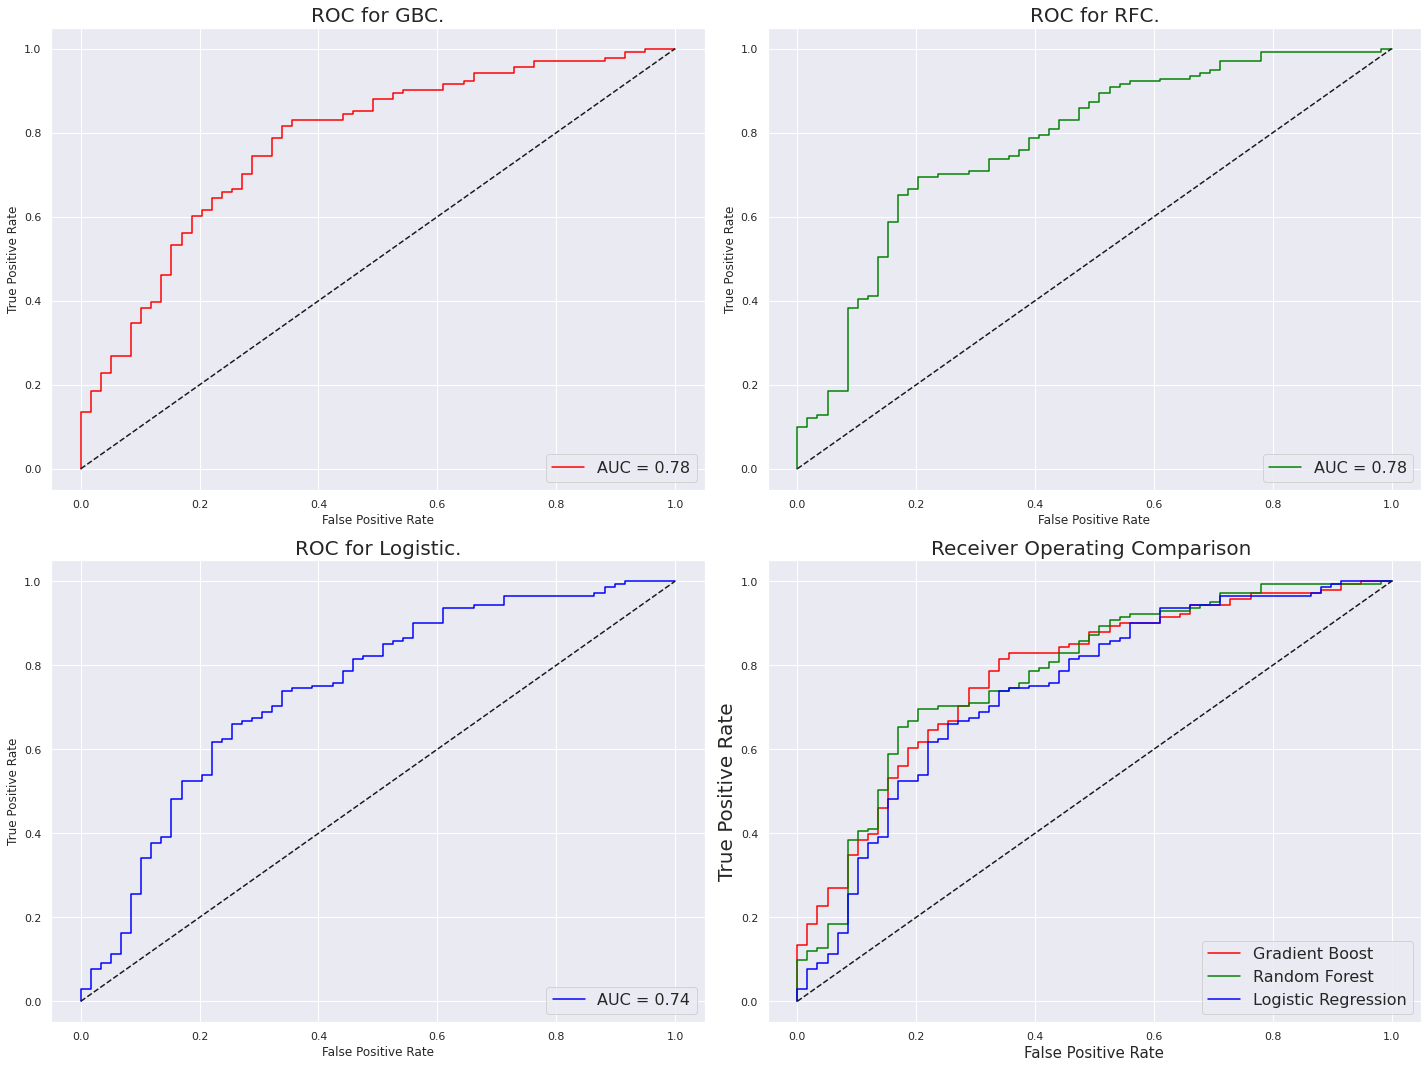

In [46]:
fig, ax_arr = plt.subplots(nrows = 2, ncols = 2, figsize = (20,15))

from sklearn import metrics

#gbc
gbc_prob = gbc.predict_proba(X_test)[:,1]
fprgbc, tprgbc, thresholdsgbc = metrics.roc_curve(y_test, gbc_prob)
roc_auc_gbc = metrics.auc(fprgbc,tprgbc)
ax_arr[0,0].plot(fprgbc, tprgbc,'b',label = 'AUC = %0.2f' % roc_auc_gbc,color = 'red')
ax_arr[0,0].plot([0, 1], [0, 1], 'k--')
ax_arr[0,0].set_xlabel('False Positive Rate')
ax_arr[0,0].set_ylabel('True Positive Rate')
ax_arr[0,0].set_title('ROC for GBC.', fontsize = 20)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})


#Random forest
rfc_prob = rfc_clf.predict_proba(X_test)[:,1]
fprRfc, tprRfc, thresholdsRfc = metrics.roc_curve(y_test, rfc_prob)
roc_auc_rfc = metrics.auc(fprRfc,tprRfc)
ax_arr[0,1].plot(fprRfc, tprRfc,'b',label = 'AUC = %0.2f' % roc_auc_rfc,color = 'green')
ax_arr[0,1].plot([0, 1], [0, 1], 'k--')
ax_arr[0,1].set_xlabel('False Positive Rate')
ax_arr[0,1].set_ylabel('True Positive Rate')
ax_arr[0,1].set_title('ROC for RFC.', fontsize = 20)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})


#Logistic Regression
lr_prob = lr.predict_proba(X_test)[:,1]
fprLr, tprLr, thresholdsLr = metrics.roc_curve(y_test, lr_prob)
roc_auc_lr = metrics.auc(fprLr,tprLr)
ax_arr[1,0].plot(fprLr, tprLr,'b',label = 'AUC = %0.2f' % roc_auc_lr,color = 'blue')
ax_arr[1,0].plot([0, 1], [0, 1], 'k--')
ax_arr[1,0].set_xlabel('False Positive Rate')
ax_arr[1,0].set_ylabel('True Positive Rate')
ax_arr[1,0].set_title('ROC for Logistic.', fontsize = 20)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#For All
ax_arr[1,1].plot(fprgbc,tprgbc, label ='Gradient Boost', color = 'red')
ax_arr[1,1].plot(fprRfc,tprRfc, label ='Random Forest', color = 'green')
ax_arr[1,1].plot(fprLr,tprLr, label ='Logistic Regression', color = 'blue')
ax_arr[1,1].plot([0, 1], [0, 1], 'k--')
ax_arr[1,1].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 
plt.show()

# **PCA** para acelerar los algoritmos de Machine Learninig (Logístic Regression)

In [96]:
pca = PCA(n_components=5)
pca.fit(X_train)

PCA(n_components=5)

In [97]:
pca.n_components_

5

In [98]:
train_X = pca.transform(X_train)
test_X = pca.transform(X_test)

In [99]:
from sklearn.linear_model import LogisticRegression

In [51]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [100]:
logisticRegr.fit(train_X, y_train)

LogisticRegression()

In [53]:
logR_pred = logisticRegr.predict(test_X)

In [54]:
logisticRegr.score(test_X,y_test)

0.765

In [55]:
confusion_matrix(logR_pred,y_test)

array([[ 22,  10],
       [ 37, 131]])

In [56]:
logR_cross_val_score = cross_val_score(logisticRegr,train_X,y_train, cv = 10).mean()
logR_cross_val_score

0.7262500000000001